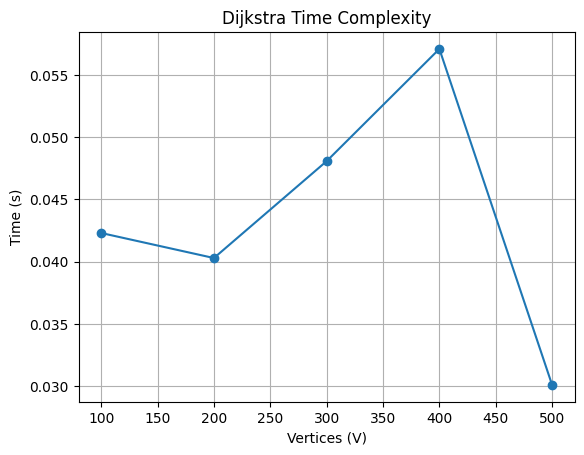

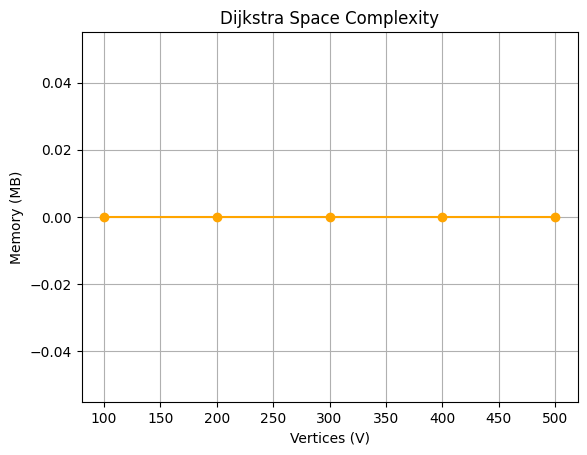

✅ Expected Time Complexity: O(E log V)
✅ Expected Space Complexity: O(V)


In [12]:
# === Problem 3: Emergency Response System (Dijkstra) ===
!pip install memory_profiler psutil matplotlib --quiet

import heapq, time, random
from collections import defaultdict
from memory_profiler import memory_usage
import matplotlib.pyplot as plt

def dijkstra(graph, src):
    dist = {node: float('inf') for node in graph}
    dist[src] = 0
    pq = [(0, src)]
    while pq:
        d, node = heapq.heappop(pq)
        if d > dist[node]:
            continue
        for nei, w in graph[node]:
            if d + w < dist[nei]:
                dist[nei] = d + w
                heapq.heappush(pq, (dist[nei], nei))
    return dist

def generate_weighted_graph(V):
    graph = defaultdict(list)
    for i in range(V):
        for j in range(i + 1, V):
            if random.random() < 0.05:
                w = random.randint(1, 20)
                graph[i].append((j, w))
                graph[j].append((i, w))
    return graph

sizes, times, mems = [], [], []
for V in range(100, 600, 100):
    graph = generate_weighted_graph(V)
    start = time.time()
    mem_usage = memory_usage((dijkstra, (graph, 0)), interval=0.1)
    times.append(time.time() - start)
    mems.append(max(mem_usage) - min(mem_usage))
    sizes.append(V)

plt.plot(sizes, times, marker='o'); plt.title("Dijkstra Time Complexity")
plt.xlabel("Vertices (V)"); plt.ylabel("Time (s)"); plt.grid(True); plt.show()

plt.plot(sizes, mems, marker='o', color='orange'); plt.title("Dijkstra Space Complexity")
plt.xlabel("Vertices (V)"); plt.ylabel("Memory (MB)"); plt.grid(True); plt.show()

print("✅ Expected Time Complexity: O(E log V)")
print("✅ Expected Space Complexity: O(V)")
